## קוד בסיסי לתקשורת עם DAC_ACD
מתבסס על הקובץ myserial.py 

In [1]:
from myserial import *    
from time import sleep
import pandas as pd
%matplotlib inline
print("ready")

ready


In [23]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    run_operation(ser,"*RDY?", ver=True)



OP *RDY? returned READY



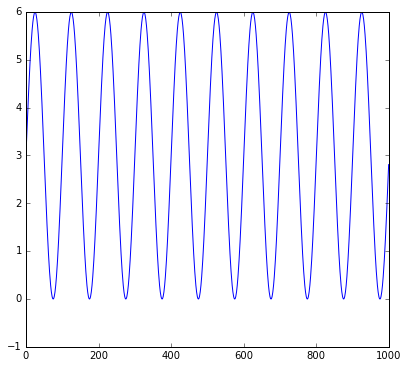

In [49]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    data = pd.Series(buffer_sine(ser, dac_channel=2, 
    adc_channel=2, mid_voltage = 3, amplitude = 3,
    frequency = 40, steps = 100,
    iterations = 10))
data.plot()

In [44]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    ser.reset_output_buffer()
    init_serial(ser)
    run_operation(ser,"SINE,2,1,4,40, 150", ver=True)



OP SINE,2,1,4,40, 150 returned Running real freq : 40.16



In [82]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    run_operation(ser, "SET,2,3")


In [6]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    try:
        while True:
            run_operation(ser, "RAMP1,2,-4,4.8,50,10")
            run_operation(ser, "RAMP1,2,4.8,-4,50,10")
            run_operation(ser, "RAMP1,0,4.8,-4,50,10")
            run_operation(ser, "RAMP1,0,-4,4.8,50,10")
    except :
        pass

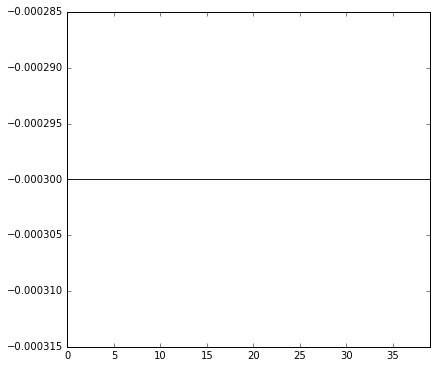

In [2]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    ls = [float(run_operation(ser, "GET_ADC,2")) for i in range(40)]
import pandas as pd
pd.Series(ls).plot()

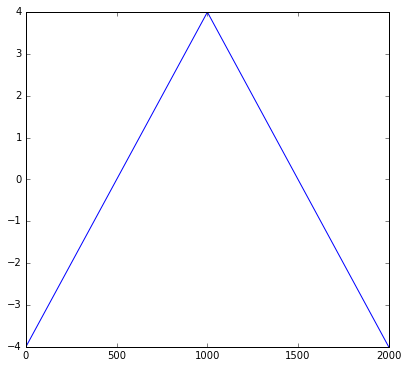

In [5]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    res = buffer_ramp(ser, dac_channel=2,adc_channel=2,
                      begin_voltage=-4,end_voltage=4, 
                      number_of_steps = 1000, 
                      delay_in_microsecs = 30)
    res += buffer_ramp(ser, dac_channel=2,adc_channel=2,
                      begin_voltage=4,end_voltage=-4, 
                      number_of_steps = 1000, 
                      delay_in_microsecs = 30)
pd.Series(res).plot()

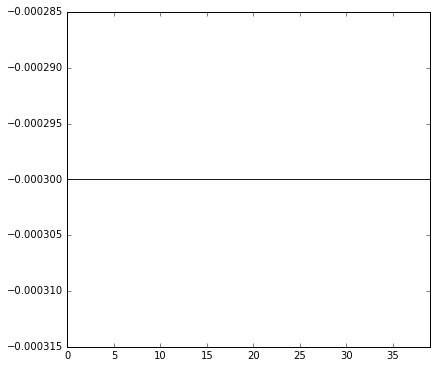

In [2]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    ls = [float(run_operation(ser, "GET_ADC,2")) for i in range(40)]
import pandas as pd
pd.Series(ls).plot()

In [ ]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    while True:
        for i in range(-4,5):
            run_operation(ser, "SET,2,{}".format(i))
            sleep(1)


KeyboardInterrupt: 

In [ ]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    while True:
        run_operation(ser, "SET,2,-2")
        sleep(.03)
        run_operation(ser, "SET,2,2")
        sleep(.03)


In [ ]:
!open ./myserial.py

את הפרוטוקול אפשר למצוא באתר הזה:

http://opendacs.com/dac-adc-homepage/how-to-communicate-with-the-dac-adc/


תיעוד של tft.h:

https://www.arduino.cc/en/Reference/TFTLibrary